In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from Scripts import gating
np.random.seed(0)

In [27]:
## Simulate Gated Accumulator For 1000 Delay Times 
params = np.array([1, 6e-01, 1, 9.5e-02,
                    4.3e-03, 7.9e-04, 1, 1])
model = gating.baselineDynamicIntegrator('Sample Model', time = np.arange(1,2000), xO = params[0], 
                          theta = params[1], kappa = params[2], sigma = params[3], muR = params[4],
                          sR = params[5], k = params[6], scale = params[7], maxT = 700,)
model.setDelayTimes(delays = np.random.uniform(750, 1250, 1000))
model.BDI()

Text(0.5, 1.0, 'Sampled Anticipatory Dist')

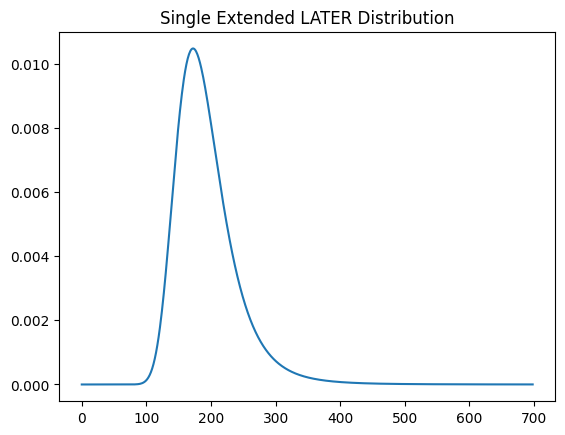

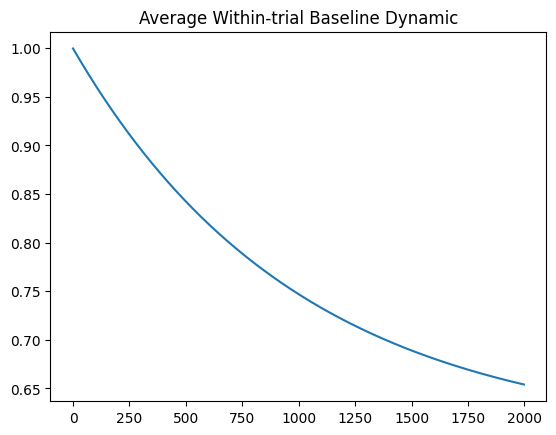

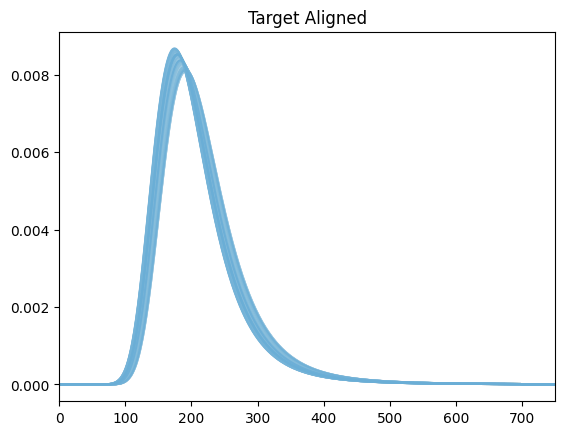

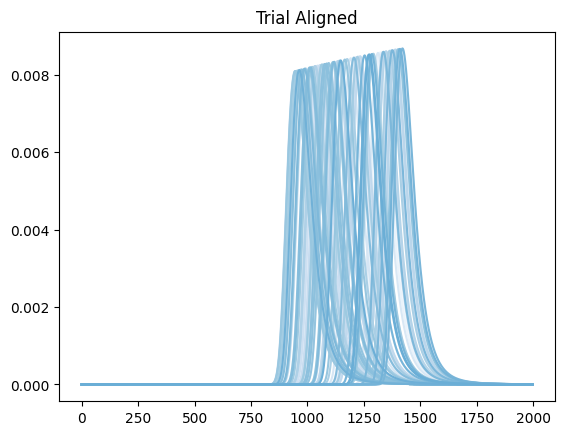

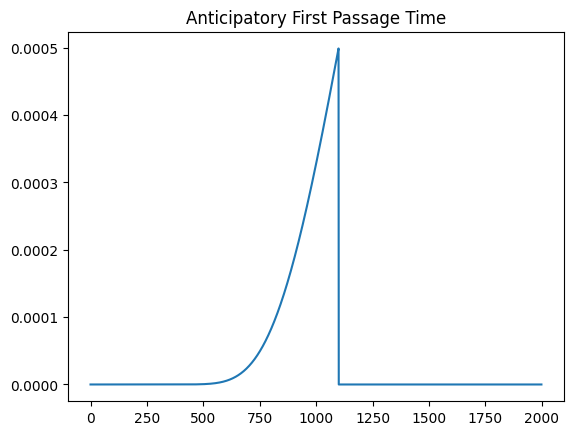

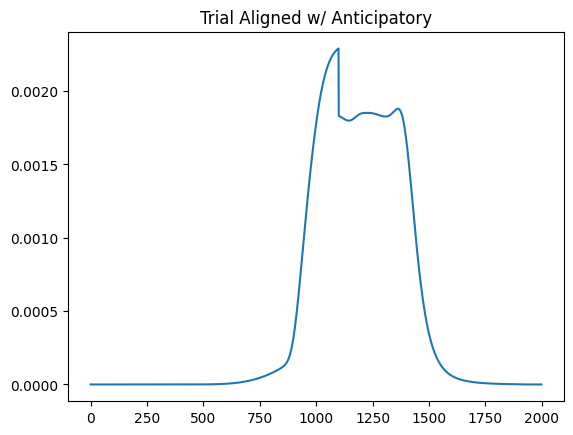

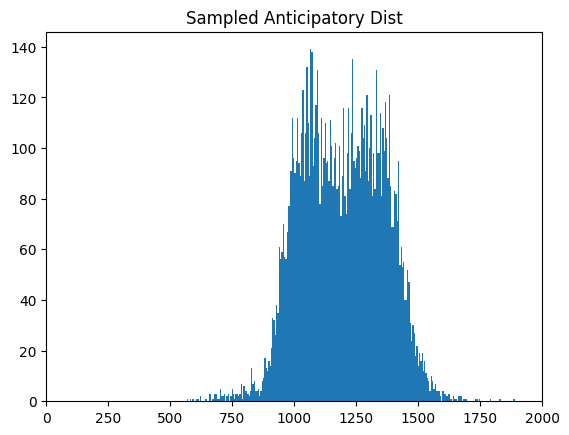

In [28]:
## Plot Model Outputs
color = iter(cm.Blues(np.linspace(0,.5, 100)))

plt.plot(model.extended_later(6/1000, 1, 1/1000, .1))
plt.title('Single Extended LATER Distribution')

plt.figure()
plt.plot(model.ouMean)
plt.title('Average Within-trial Baseline Dynamic')

plt.figure()
for i in range(100):    
    _ = plt.plot(model.pTargetOnset[:,i], color = next(color))
    
plt.title('Target Aligned')
plt.xlim([0, 750])

color = iter(cm.Blues(np.linspace(0,.5, 100)))

plt.figure()
for i in range(100):    
    _ = plt.plot(model.pTrialOnset[:,i], color = next(color))
plt.title('Trial Aligned')

plt.figure()
plt.plot(model.pAnticipatory)
plt.title('Anticipatory First Passage Time')


plt.figure()
_ = plt.plot(model.combined)
plt.title('Trial Aligned w/ Anticipatory')

plt.figure()
_ = plt.hist(np.random.choice(1999, 10000, p = model.combined / sum(model.combined)), bins = 250)
plt.xlim([0, 2000])
plt.title('Sampled Anticipatory Dist')


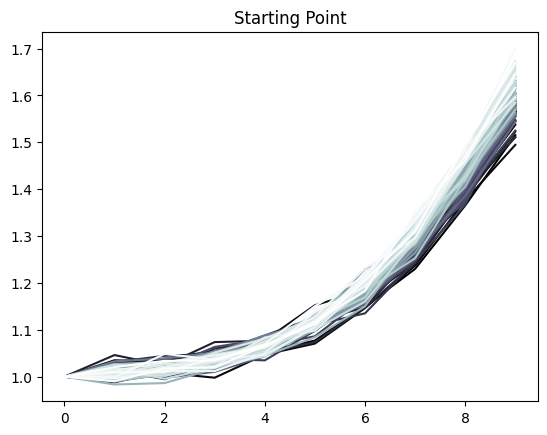

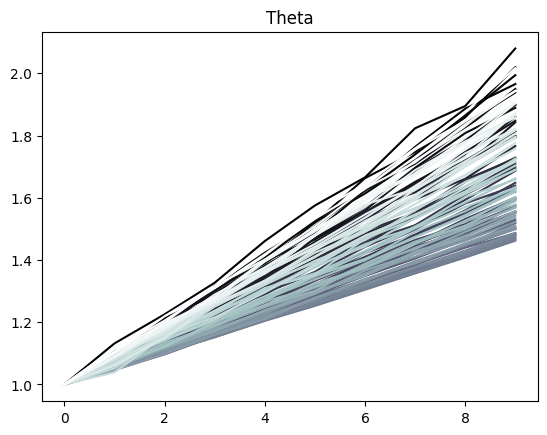

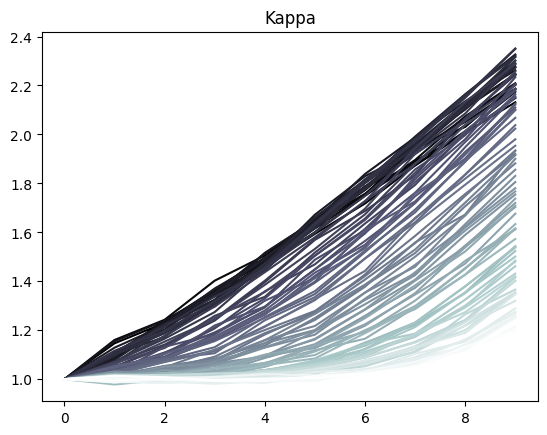

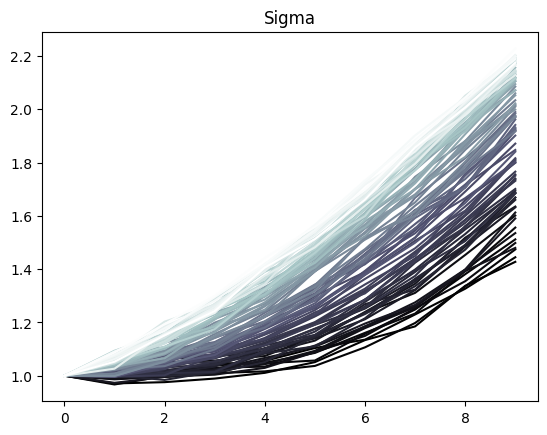

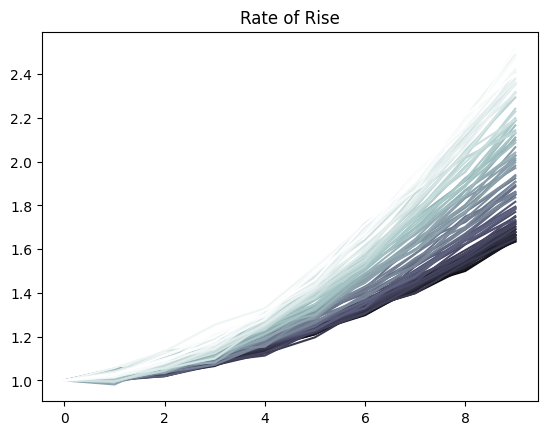

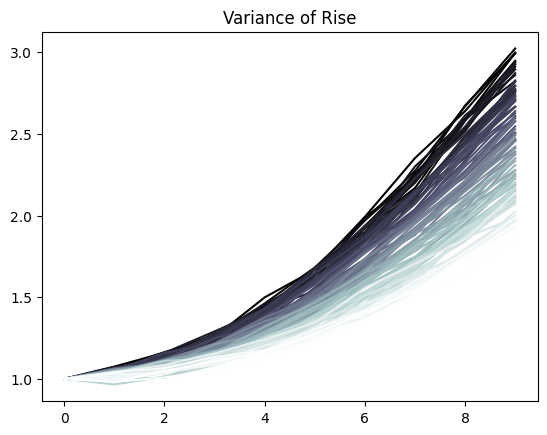

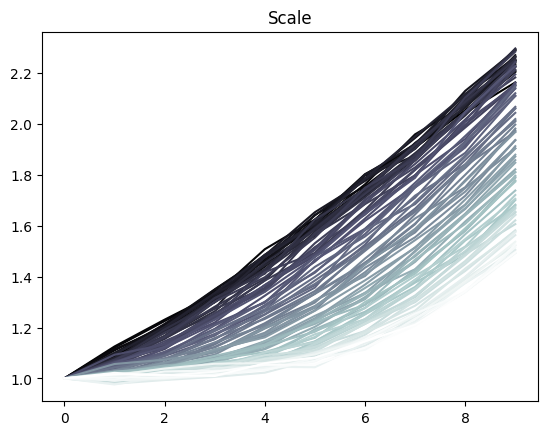

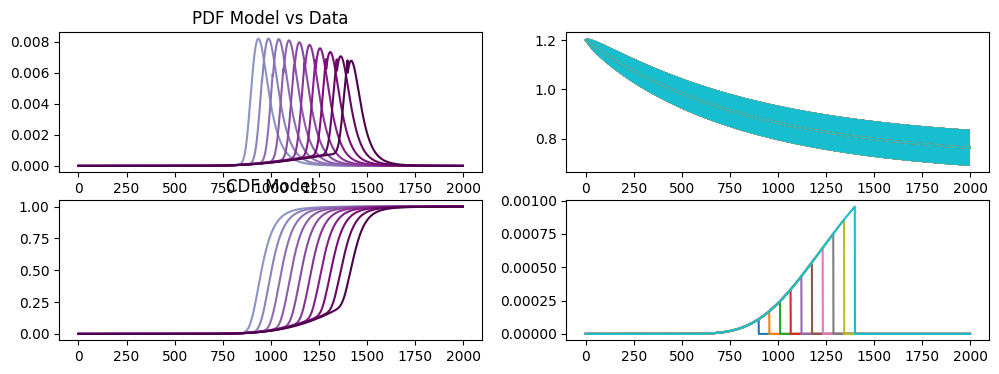

In [29]:
## Plot RT Delay median by parameter change
percent_change = .2
numSteps = 100
numBins = 10
minDelay = 750
maxDelay = 1250 

## Plot same parameter set for collapsing boundaries
for var in range(7):
    plt.figure()
    gating.plotParamRTByDelay(params = params, var = var, percent_change = percent_change, numSteps = numSteps,
                       numBins = numBins, minDelay = minDelay, 
                       maxDelay = maxDelay, medorstd = 'std')

gating.plotModelParameters(params, minDelay, maxDelay, numBins)